In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('regression_data.csv', sep=';')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,13/10/2014,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650,221900
1,6414100192,09/12/2014,3,"2,25",2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639,538000
2,5631500400,25/02/2015,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,"47,7379","-122,233",2720,8062,180000
3,2487200875,09/12/2014,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000,604000
4,1954400510,18/02/2015,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,21/05/2014,3,"2,5",1530,1131,3,0,0,3,...,1530,0,2009,0,98103,"47,6993","-122,346",1530,1509,360000
21593,6600060120,23/02/2015,4,"2,5",2310,5813,2,0,0,3,...,2310,0,2014,0,98146,"47,5107","-122,362",1830,7200,400000
21594,1523300141,23/06/2014,2,"0,75",1020,1350,2,0,0,3,...,1020,0,2009,0,98144,"47,5944","-122,299",1020,2007,402101
21595,291310100,16/01/2015,3,"2,5",1600,2388,2,0,0,3,...,1600,0,2004,0,98027,"47,5345","-122,069",1410,1287,400000


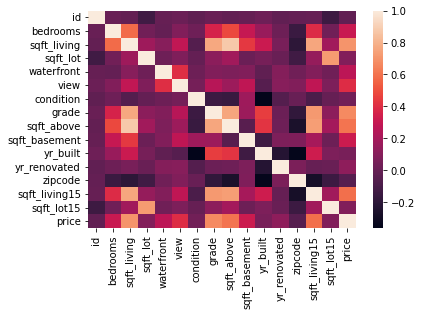

In [3]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [4]:
corr_data = df.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
id,1.000000,0.006174,0.001669,-0.116560,-0.003579,0.012455,-0.023940,0.019907,0.003541,0.001374,0.026725,-0.017488,-0.005302,0.000154,-0.114629,0.004267
bedrooms,0.006174,1.000000,0.647670,0.217035,-0.007727,0.081671,0.011714,0.380357,0.540135,0.229829,0.180627,0.016611,-0.167775,0.444209,0.202247,0.344245
sqft_living,0.001669,0.647670,1.000000,0.304746,0.070330,0.233010,-0.063100,0.716258,0.843348,0.327830,0.352507,0.052610,-0.207220,0.747038,0.284589,0.643993
sqft_lot,-0.116560,0.217035,0.304746,1.000000,0.085660,0.117586,0.114995,0.152484,0.273095,0.036755,-0.037288,0.008555,-0.319389,0.359815,0.922335,0.075071
waterfront,-0.003579,-0.007727,0.070330,0.085660,1.000000,0.285052,0.016707,0.062189,0.054495,0.051940,-0.028599,0.091636,0.029583,0.074582,0.092339,0.115119
view,0.012455,0.081671,0.233010,0.117586,0.285052,1.000000,0.046078,0.217126,0.144248,0.236750,-0.066901,0.096594,0.077996,0.255963,0.117138,0.293906
condition,-0.023940,0.011714,-0.063100,0.114995,0.016707,0.046078,1.000000,-0.168104,-0.158571,0.161351,-0.393906,-0.066323,-0.022414,-0.087096,0.117914,0.017995
grade,0.019907,0.380357,0.716258,0.152484,0.062189,0.217126,-0.168104,1.000000,0.711690,0.092659,0.500895,0.015939,-0.181892,0.662749,0.156593,0.658152
sqft_above,0.003541,0.540135,0.843348,0.273095,0.054495,0.144248,-0.158571,0.711690,1.000000,-0.165983,0.471861,0.030892,-0.279021,0.696718,0.255021,0.541563
sqft_basement,0.001374,0.229829,0.327830,0.036755,0.051940,0.236750,0.161351,0.092659,-0.165983,1.000000,-0.177941,0.062740,0.114431,0.129705,0.030767,0.251491


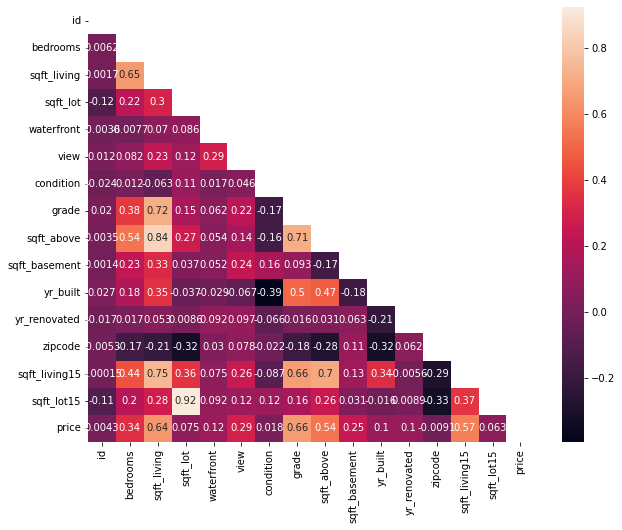

In [5]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [6]:
x = np.asanyarray(df.drop(columns=['id','date','price','zipcode', 'condition']))
y = np.asanyarray(df[['price']])

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

In [8]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  int64 
 1   date           21597 non-null  object
 2   bedrooms       21597 non-null  int64 
 3   bathrooms      21597 non-null  object
 4   sqft_living    21597 non-null  int64 
 5   sqft_lot       21597 non-null  int64 
 6   floors         21597 non-null  object
 7   waterfront     21597 non-null  int64 
 8   view           21597 non-null  int64 
 9   condition      21597 non-null  int64 
 10  grade          21597 non-null  int64 
 11  sqft_above     21597 non-null  int64 
 12  sqft_basement  21597 non-null  int64 
 13  yr_built       21597 non-null  int64 
 14  yr_renovated   21597 non-null  int64 
 15  zipcode        21597 non-null  int64 
 16  lat            21597 non-null  object
 17  long           21597 non-null  object
 18  sqft_living15  21597 non-n

In [9]:
df['floors'].value_counts()

1      10673
2       8235
1,5     1910
3        611
2,5      161
3,5        7
Name: floors, dtype: int64

In [10]:
df['long'].value_counts()

-122,29     115
-122,3      111
-122,362    104
-122,291    100
-122,372     99
           ... 
-122,459      1
-121,726      1
-121,819      1
-122,44       1
-121,403      1
Name: long, Length: 751, dtype: int64

In [11]:
df['bathrooms'].value_counts()

2,5     5377
1       3851
1,75    3048
2,25    2047
2       1930
1,5     1445
2,75    1185
3        753
3,5      731
3,25     589
3,75     155
4        136
4,5      100
4,25      79
0,75      71
4,75      23
5         21
5,25      13
5,5       10
1,25       9
6          6
0,5        4
5,75       4
6,75       2
8          2
6,25       2
6,5        2
7,5        1
7,75       1
Name: bathrooms, dtype: int64

In [12]:
df['lat'].value_counts()

47,5491    17
47,6846    17
47,5322    17
47,6624    17
47,6711    16
           ..
47,1976     1
47,3013     1
47,6139     1
47,4184     1
47,6502     1
Name: lat, Length: 5033, dtype: int64

In [13]:
df['date'].value_counts()

23/06/2014    142
25/06/2014    131
26/06/2014    131
08/07/2014    127
27/04/2015    126
             ... 
02/11/2014      1
31/01/2015      1
24/05/2015      1
17/05/2014      1
27/07/2014      1
Name: date, Length: 372, dtype: int64

In [14]:
df['floors'] = df['floors'].str.replace(',','.')

In [15]:
df['floors'].value_counts()

1      10673
2       8235
1.5     1910
3        611
2.5      161
3.5        7
Name: floors, dtype: int64

In [16]:
df['bathrooms'] = df['bathrooms'].str.replace(',','.')

In [17]:
df['long'] = df['long'].str.replace(',','.')

In [18]:
df['lat'] = df['lat'].str.replace(',','.')

In [19]:
df['date'] = df['date'].str.replace(',','.')

In [20]:
df['floors'] = df['floors'].astype('float')

In [21]:
df['bathrooms'] = df['bathrooms'].astype('float')

In [22]:
df['long'] = df['long'].astype('float')

In [23]:
df['lat'] = df['lat'].astype('float')

In [24]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [25]:
df["price"].unique()

array([221900, 538000, 180000, ..., 541800, 610685, 402101], dtype=int64)

In [26]:
data_price = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15", "price"]]

In [27]:
data_price

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000


In [28]:
data_price = data_price.dropna()
data_price

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000


In [29]:
corr_data = data_price.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')
correlations_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.520846,0.647670,0.217035,0.228403,-0.007727,0.081671,0.011714,0.380357,0.540135,0.229829,0.180627,0.016611,-0.021766,0.192542,0.444209,0.202247,0.344245
bathrooms,0.520846,1.000000,0.745880,0.069162,0.547604,0.049487,0.155985,-0.163745,0.658456,0.691388,0.191390,0.567656,0.042535,0.008099,0.262286,0.570727,0.063694,0.497298
sqft_living,0.647670,0.745880,1.000000,0.304746,0.401190,0.070330,0.233010,-0.063100,0.716258,0.843348,0.327830,0.352507,0.052610,0.030639,0.285299,0.747038,0.284589,0.643993
sqft_lot,0.217035,0.069162,0.304746,1.000000,-0.234040,0.085660,0.117586,0.114995,0.152484,0.273095,0.036755,-0.037288,0.008555,-0.121878,0.370528,0.359815,0.922335,0.075071
floors,0.228403,0.547604,0.401190,-0.234040,1.000000,0.023913,0.019181,-0.288061,0.501792,0.599187,-0.272484,0.551438,0.012637,0.024265,0.148899,0.305575,-0.230907,0.322482
waterfront,-0.007727,0.049487,0.070330,0.085660,0.023913,1.000000,0.285052,0.016707,0.062189,0.054495,0.051940,-0.028599,0.091636,-0.019079,-0.038126,0.074582,0.092339,0.115119
view,0.081671,0.155985,0.233010,0.117586,0.019181,0.285052,1.000000,0.046078,0.217126,0.144248,0.236750,-0.066901,0.096594,-0.000444,-0.102401,0.255963,0.117138,0.293906
condition,0.011714,-0.163745,-0.063100,0.114995,-0.288061,0.016707,0.046078,1.000000,-0.168104,-0.158571,0.161351,-0.393906,-0.066323,-0.022549,-0.084992,-0.087096,0.117914,0.017995
grade,0.380357,0.658456,0.716258,0.152484,0.501792,0.062189,0.217126,-0.168104,1.000000,0.711690,0.092659,0.500895,0.015939,0.103576,0.223370,0.662749,0.156593,0.658152
sqft_above,0.540135,0.691388,0.843348,0.273095,0.599187,0.054495,0.144248,-0.158571,0.711690,1.000000,-0.165983,0.471861,0.030892,-0.026223,0.386203,0.696718,0.255021,0.541563


In [30]:
X = data_price.drop(['price'], axis=1)
y = data_price['price']


X = sm.add_constant(X)

model = sm.OLS(y,X,missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3085.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:13:18   Log-Likelihood:            -2.9454e+05
No. Observations:               21597   AIC:                         5.891e+05
Df Residuals:                   21580   BIC:                         5.892e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.693e+07    1.6e+06    -23.108      0.000   -4.01e+07   -3.38e+07
bedrooms      -3.393e+04   1912.383    -17.741      0.000   -3.77e+04   -3.02e+04
bathrooms      4.233e+04   3290.586     12.864      0.000    3.59e+04    4.88e+04
sqft_living     108.4425      2.292     47.321      0.000     103.951     112.934
sqft_lot          0.1278      0.048      2.648      0.008       0.033       0.222
floors          525.6575   3611.848      0.146      0.884   -6553.831    7605.146
waterfront     5.882e+05   1.75e+04     33.640      0.000    5.54e+05    6.22e+05
view           4.934e+04   2147.487     22.977      0.000    4.51e+04    5.36e+04
condition      3.144e+04   2355.032     13.349      0.000    2.68e+04    3.61e+04
grade          9.836e+04   2175.037     45.224      0.000    9.41e+04    1.03e+05
sqft_above       70.7333      2.271     31.149      0.000      66.282      75.184
sqft_basement    37.7120      2.667     14.142      0.000      32.485      42.939
yr_built      -2464.3863     72.646    -33.923      0.000   -2606.777   -2321.996
yr_renovated     21.5477      3.681      5.854      0.000      14.333      28.762
lat            5.606e+05   1.06e+04     53.124      0.000     5.4e+05    5.81e+05
long          -1.179e+05    1.2e+04     -9.806      0.000   -1.41e+05   -9.43e+04
sqft_living15    26.8783      3.460      7.767      0.000      20.096      33.661
sqft_lot15       -0.4018      0.074     -5.439      0.000      -0.547      -0.257
==============================================================================
Omnibus:                    18499.174   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1875968.664
Skew:                           3.610   Prob(JB):                         0.00
Kurtosis:                      48.084   Cond. No.                     6.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
X = data_price.drop(['price'], axis=1)
y = data_price['price']

lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False)
mae = mean_absolute_error(y, predictions)

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.7
RMSE: 202610.53878905674
MAE: 126306.81436554098


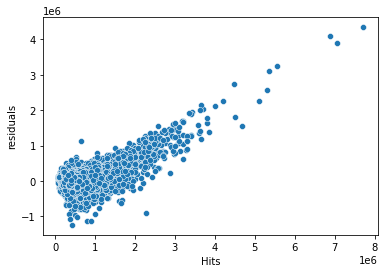

In [32]:
residuals = y - predictions

plot = sns.scatterplot(y,residuals)
plot.set(xlabel='Hits', ylabel='residuals')
plt.show()

<AxesSubplot:xlabel='price'>

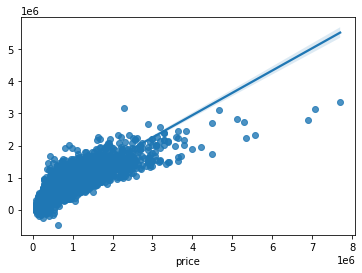

In [33]:
sns.regplot(y, predictions)

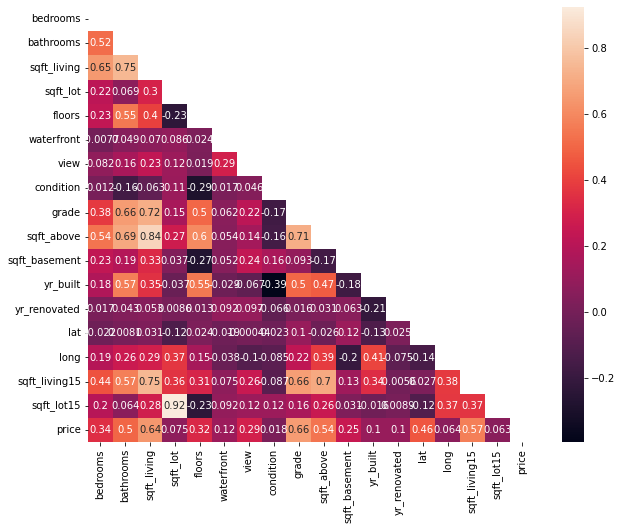

In [34]:
corr_data1 = data_price.select_dtypes([np.number])
correlations_matrix1 = corr_data1.corr(method='spearman')
mask = np.zeros_like(correlations_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix1, mask=mask, annot=True)
plt.show()